In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.environ["DMRGROOT"]) # add the library via environmental variable
# you have to install the dmrgpy library from
# https://github.com/joselado/dmrgpy
# and add its address to your python path (done above with an environmental variable)

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'


import numpy as np

# [OPTIONAL SESSION] Solid State Physics, session 9: Tensor network methods

### Contents

### Learning outcomes
- To understand how tensor networks allow solving quantum many-body systems



## Magnetization of a Heisenberg model
Here we will show that a quantum Heiseneberg model has zero magnetization

(0.0, 39.0)

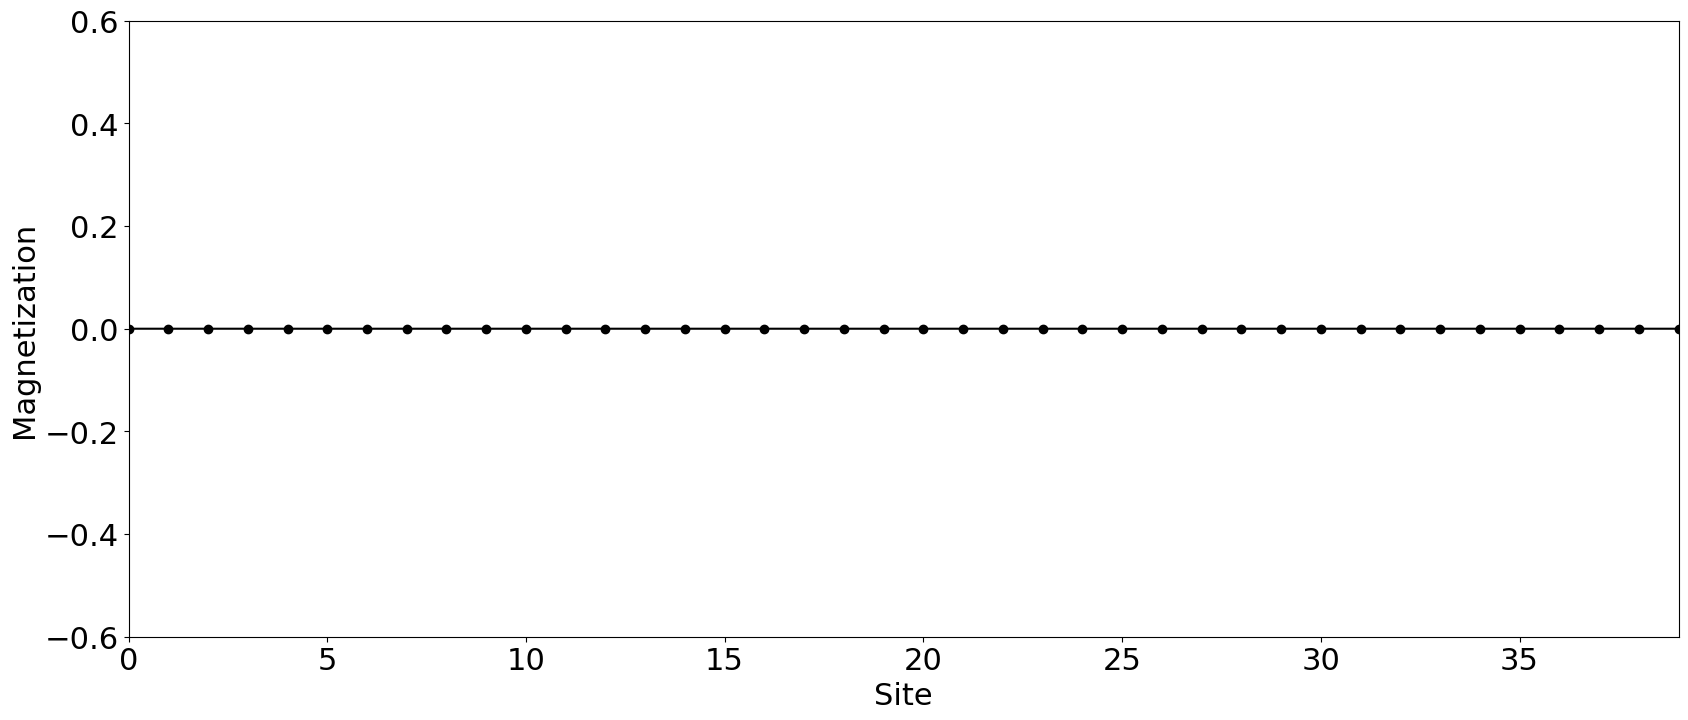

In [2]:
from dmrgpy import spinchain
n = 40
spins = ["S=1/2" for i in range(n)] # S=1 in each site
sc = spinchain.Spin_Chain(spins) # create spin chain object
h = 0 # initialize Hamiltonian
for i in range(len(spins)-1):
    h = h + sc.Sx[i]*sc.Sx[i+1]
    h = h + sc.Sy[i]*sc.Sy[i+1]
    h = h + sc.Sz[i]*sc.Sz[i+1]
sc.set_hamiltonian(h) # create the Hamiltonian
iis = range(n)
cs = [sc.vev(sc.Sz[i]) for i in iis]

plt.plot(iis,cs,marker="o",c="black")
plt.xlabel("Site") ; plt.ylabel("Magnetization") ; plt.ylim([-0.6,0.6]) ; plt.xlim([min(iis),max(iis)])

### Quiz
- Why is the magnetization zero everywhere?

## Magnetization of a Heisenberg model with a magnetic impurity
Here we will now add a magnetic impurity to a quantum Heisenberg model, and see how the magnetization decays with distance

(0.0, 39.0)

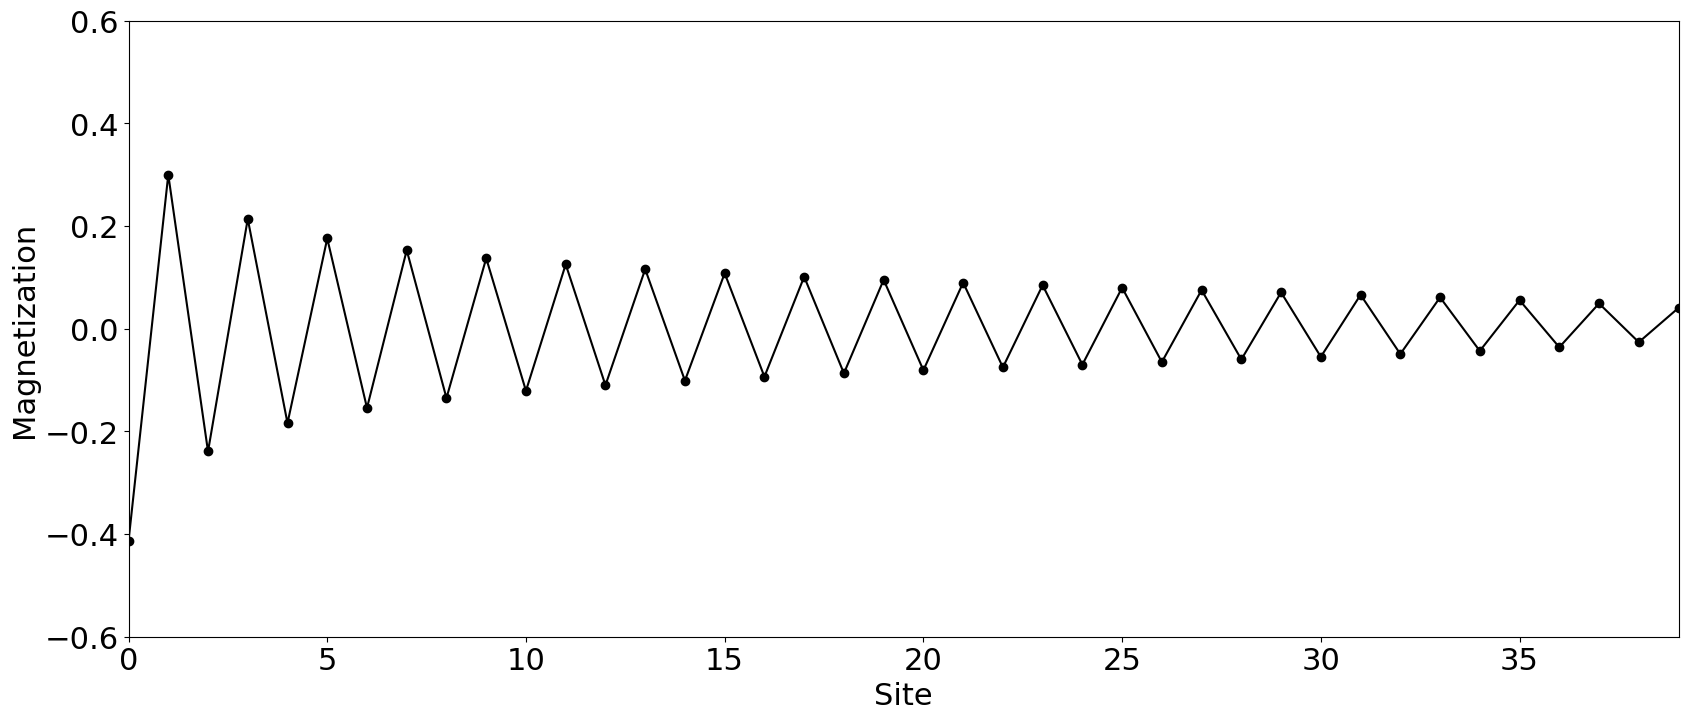

In [3]:
from dmrgpy import spinchain
n = 40 # length of the system
spins = ["S=1/2" for i in range(n)] # S=1 in each site
sc = spinchain.Spin_Chain(spins) # create spin chain object
h = 0 # initialize Hamiltonian
for i in range(len(spins)-1):
    h = h + sc.Sx[i]*sc.Sx[i+1]
    h = h + sc.Sy[i]*sc.Sy[i+1]
    h = h + sc.Sz[i]*sc.Sz[i+1]

    
Bz = 1. # local magnetization
h = h + Bz*sc.Sz[0]
    
sc.set_hamiltonian(h) # create the Hamiltonian
iis = range(n)
cs = [sc.vev(sc.Sz[i]) for i in iis]

plt.plot(iis,cs,marker="o",c="black")
plt.xlabel("Site") ; plt.ylabel("Magnetization") ; plt.ylim([-0.6,0.6]) ; plt.xlim([min(iis),max(iis)])

### Quiz
- Why does the magnetization decay away from the magnetic site?

## Magnetization of a dimerized Heisenberg model with a magnetic impurity
Here we will now add a magnetic impurity to a dimerized quantum Heisenberg model, and see how the magnetization decays with distance

(0.0, 39.0)

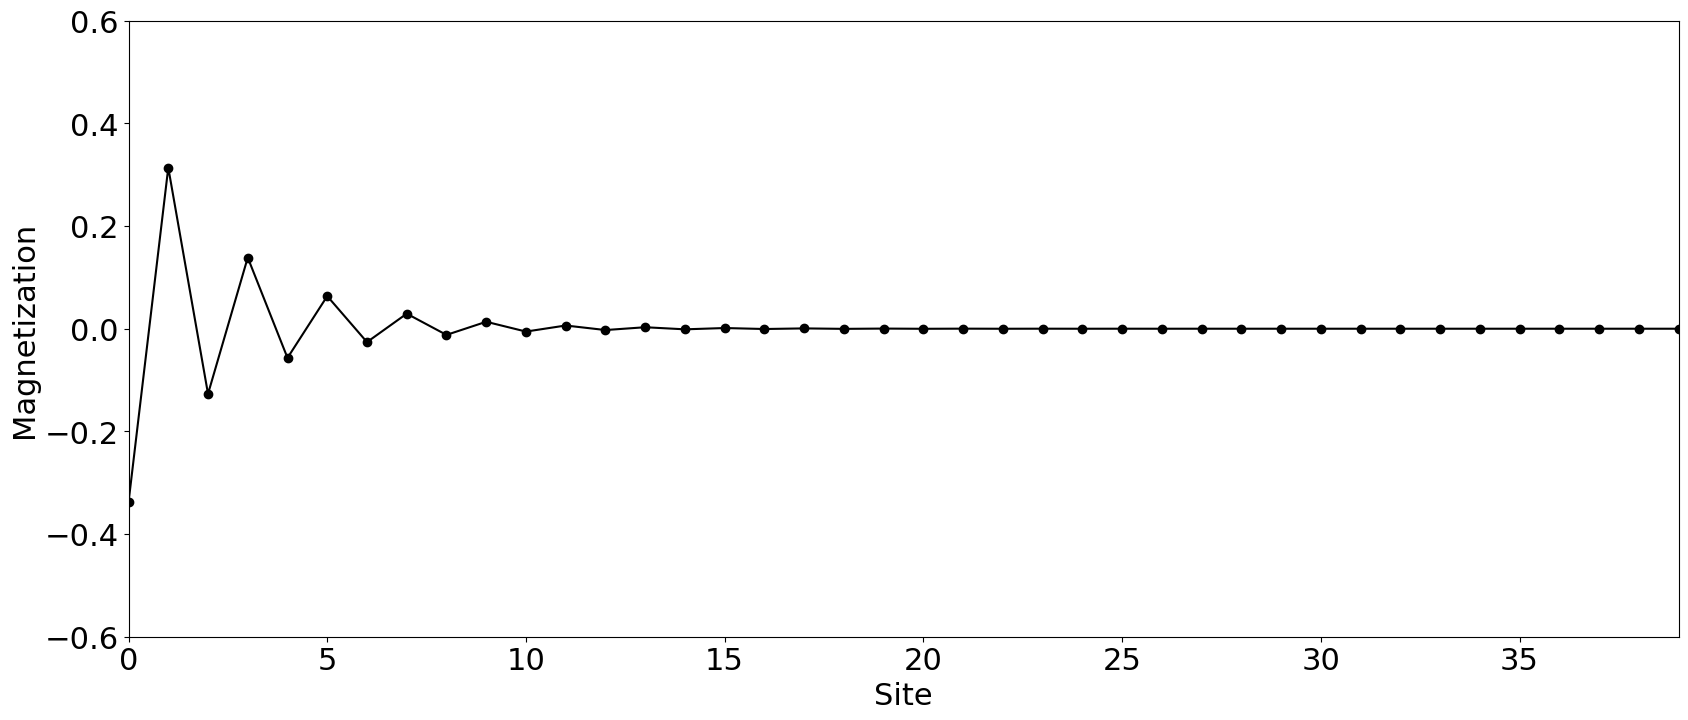

In [4]:
from dmrgpy import spinchain
n = 40 # length of the system
spins = ["S=1/2" for i in range(n)] # S=1 in each site
sc = spinchain.Spin_Chain(spins) # create spin chain object
h = 0 # initialize Hamiltonian
for i in range(len(spins)-1):
    J = 1.0 + .2*(-1)**i
    h = h + J*sc.Sx[i]*sc.Sx[i+1]
    h = h + J*sc.Sy[i]*sc.Sy[i+1]
    h = h + J*sc.Sz[i]*sc.Sz[i+1]

    
Bz = 1. # local magnetization
h = h + Bz*sc.Sz[0]
    
sc.set_hamiltonian(h) # create the Hamiltonian
iis = range(n)
cs = [sc.vev(sc.Sz[i]) for i in iis]

plt.plot(iis,cs,marker="o",c="black")
plt.xlabel("Site") ; plt.ylabel("Magnetization") ; plt.ylim([-0.6,0.6]) ; plt.xlim([min(iis),max(iis)])

### Quiz
- Why is the local magnetization decreasing?
- Why is the decrease much faster than the case above?

## The role of the bond dimension
We will now see that the bond dimension control the accuracy of the calculation, by computing the fluctuation of the energy per site

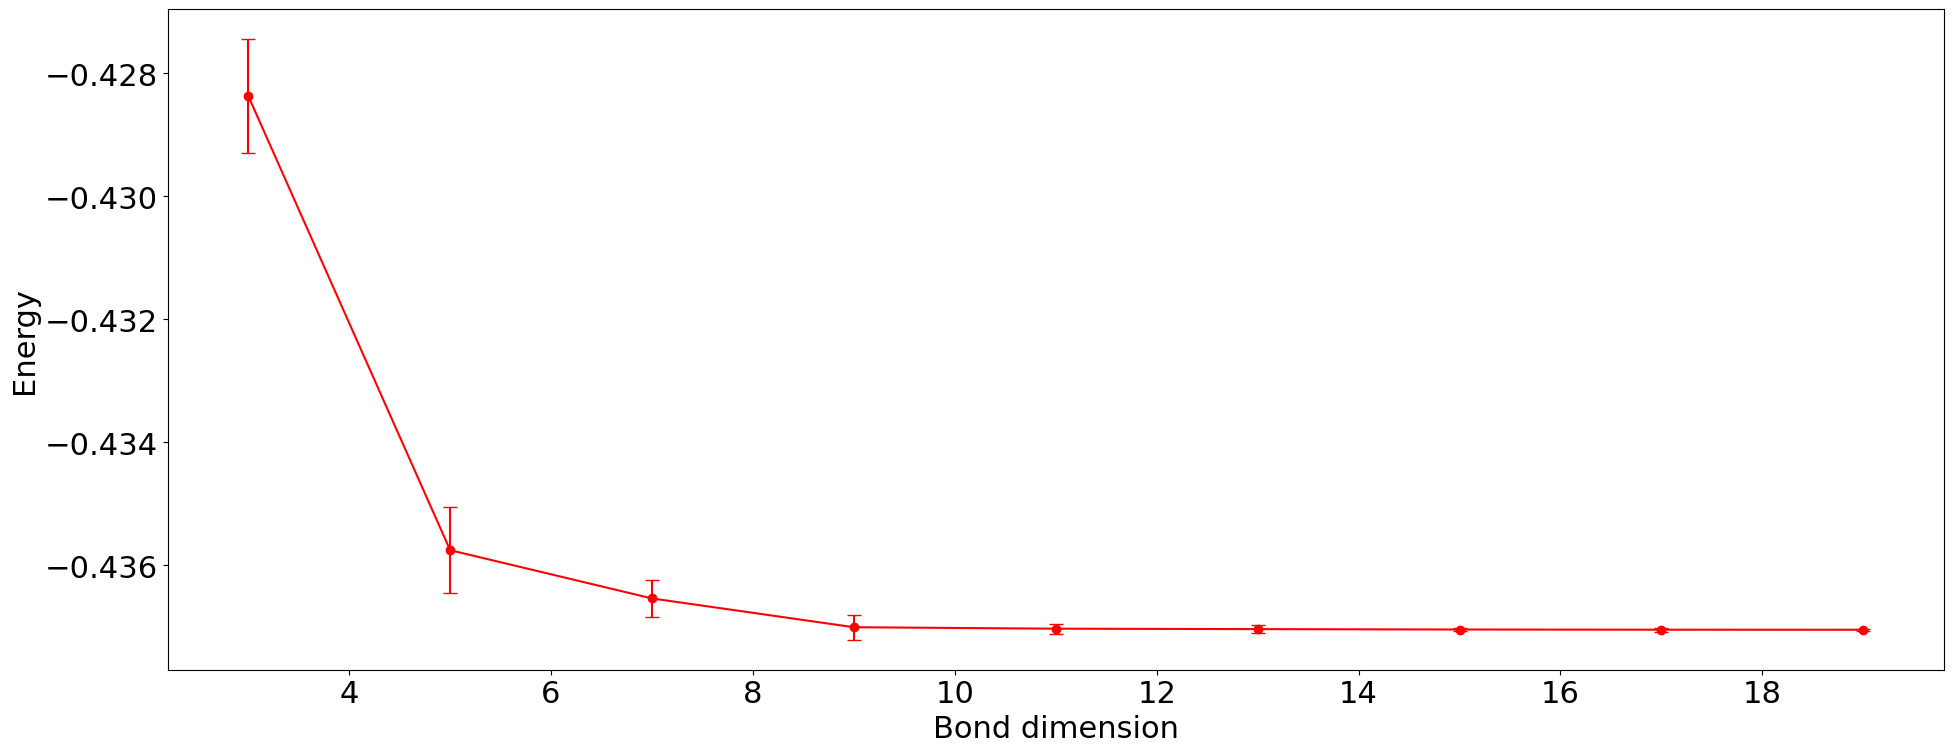

In [5]:
from dmrgpy import spinchain
import numpy as np
n= 30 # size of the chain
spins = ["S=1/2" for i in range(n)] # S=1/2 chain
sc = spinchain.Spin_Chain(spins) # create spin chain object
h = 0 # initialize Hamiltonian
for i in range(len(spins)-1):
    h = h + sc.Sx[i]*sc.Sx[i+1]
    h = h + sc.Sy[i]*sc.Sy[i+1]
    h = h + sc.Sz[i]*sc.Sz[i+1]
bds = range(3,20,2) # bond dimension
es,des = [],[] # storage of energies and fluctuations
for maxm in bds: # loop over bond dimension
    sc.set_hamiltonian(h) # create the Hamiltonian
    sc.maxm = maxm # set the bond dimension
    e = sc.gs_energy() # get the ground state energy
    wf = sc.get_gs() ; de = wf.dot(h*(h*wf)) # Energy square
    de = np.sqrt(np.abs(de-e**2)) # energy fluctuation
    es.append(e/n) # store energy
    des.append(de/n) # energy fluctuation
    
plt.errorbar(bds,es,yerr=des,c="red",marker="o",capsize=5)
plt.ylabel("Energy")
plt.xlabel("Bond dimension")

plt.tight_layout()
plt.show()


## Gap of a many-body spin chain
We will now see how the gap for a many-body spin chain scales with the system size, both for a pristine heisenberg model and a dimerized one

(0.0, 1.0)

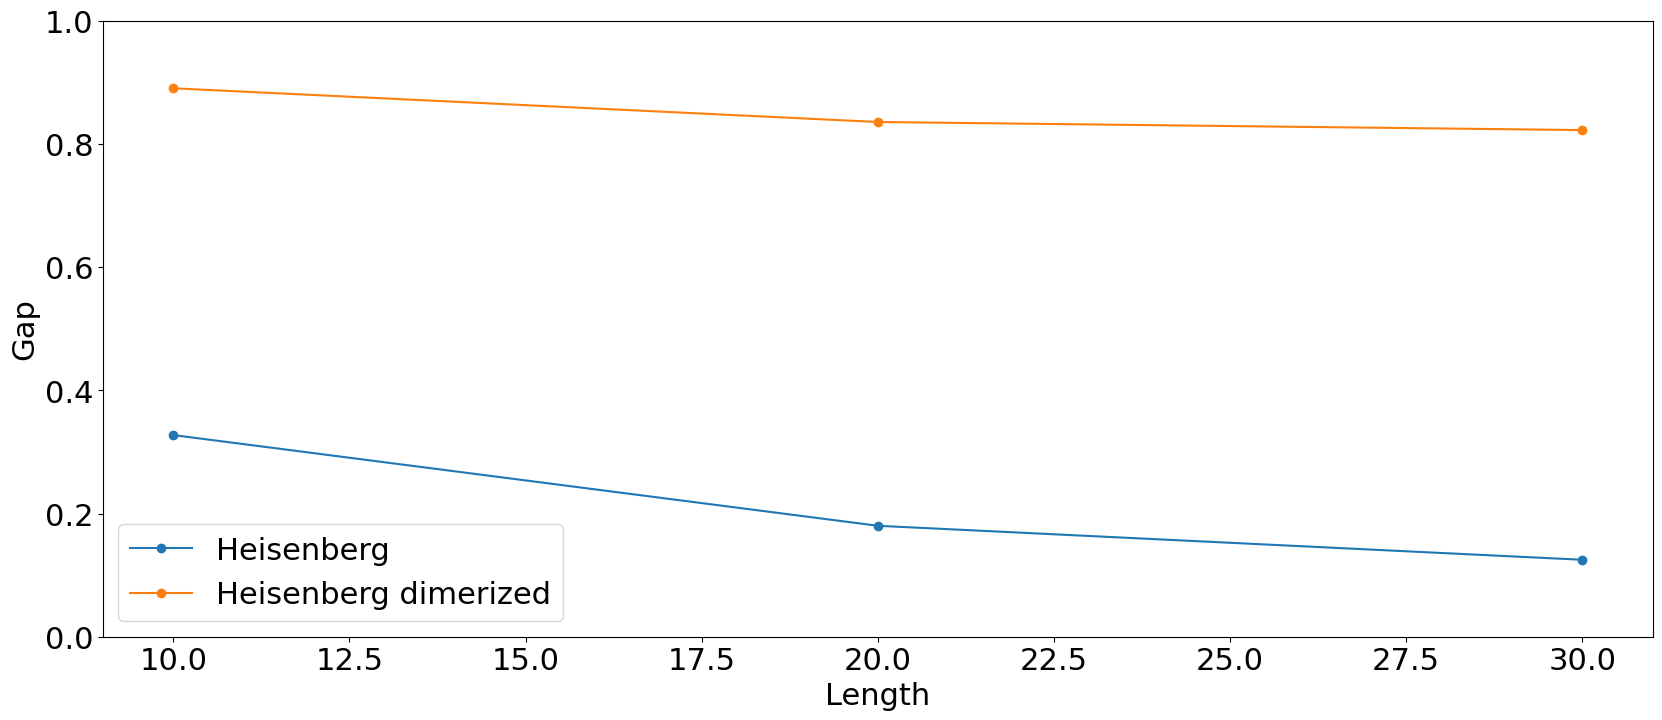

In [6]:
from dmrgpy import spinchain

def get_gap(n=40,dJ=0.):
    spins = ["S=1/2" for i in range(n)] # S=1 in each site
    sc = spinchain.Spin_Chain(spins) # create spin chain object
    h = 0 # initialize Hamiltonian
    for i in range(len(spins)-1):
        J = 1.0 + dJ*(-1)**i
        h = h + J*sc.Sx[i]*sc.Sx[i+1]
        h = h + J*sc.Sy[i]*sc.Sy[i+1]
        h = h + J*sc.Sz[i]*sc.Sz[i+1]

    sc.set_hamiltonian(h) # create the Hamiltonian
    es = sc.get_excited(n=2) # get excited state energies
    g = es[1]-es[0] # energy to the first excited state
    return g # return the many-body gap

Ls = [10,20,30] # lengths of the system to consider
gaps = [get_gap(n=L,dJ=0.) for L in Ls] # gaps for the Heisenberg model
gaps_dim = [get_gap(n=L,dJ=0.3) for L in Ls] # gaps for the dimerized Heisenberg model

plt.plot(Ls,gaps,label="Heisenberg",marker="o")
plt.plot(Ls,gaps_dim,label="Heisenberg dimerized",marker="o")
plt.legend()
plt.xlabel("Length") ; plt.ylabel("Gap") ; plt.ylim([0.,1.0])

### Quiz
- What would be the gap in the limit of infinite length for both chains?
- What is the consequence in terms of how the magnetization around an impurity decreases as shown in the examples above?

## Correlators in the Hubbard model
We will now show how the particle and spin correlators in the Hubbard model shows drastically different behavior

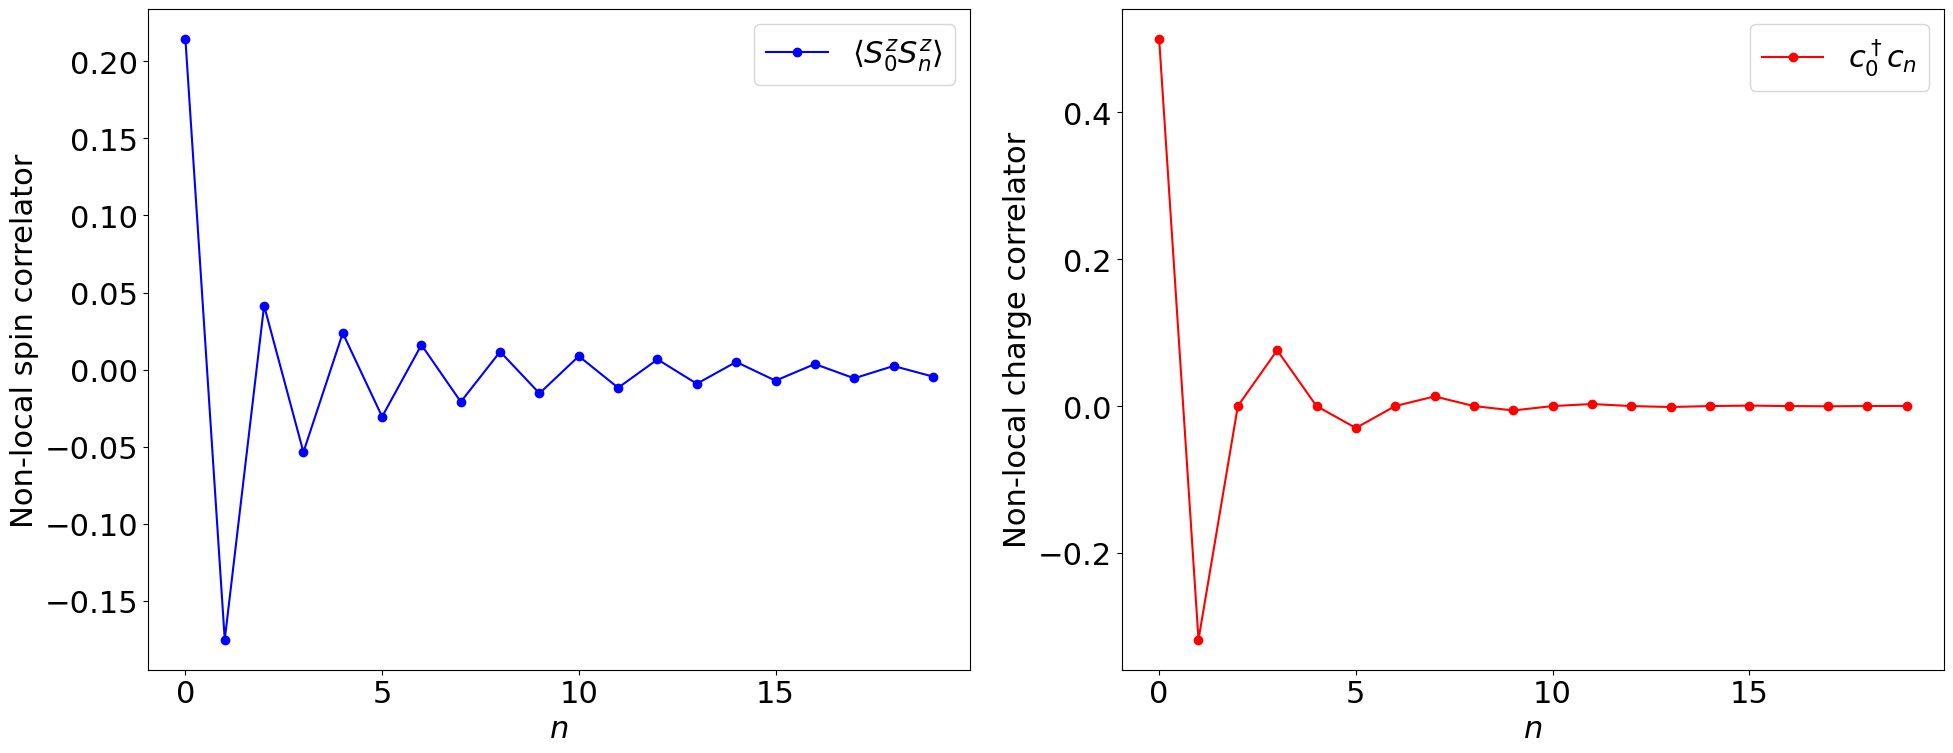

In [7]:
from dmrgpy import fermionchain
n = 20 # number of sites
fc = fermionchain.Spinful_Fermionic_Chain(n)
# first neighbor hopping
h = 0
for i in range(n-1):
  h = h + fc.Cdagup[i]*fc.Cup[i+1]
  h = h + fc.Cdagdn[i]*fc.Cdn[i+1]
h = h + h.get_dagger() # Make Hermitian
# Hubbard term
for i in range(n):
  h = h + 4.*(fc.Nup[i]-.5)*(fc.Ndn[i]-.5)
fc.set_hamiltonian(h) # initialize the Hamiltonian
# compute the particle and spin correlator
zz = [fc.vev(fc.Sz[0]*fc.Sz[i]).real for i in range(n)]
cc = [fc.vev(fc.Cdagup[0]*fc.Cup[i]).real for i in range(n)]

# now plot both
plt.subplot(1,2,1)
plt.plot(range(len(zz)),zz,marker="o",c="blue",label="$\langle S^z_0S^z_n\\rangle$")
plt.ylabel("Non-local spin correlator")
plt.legend()
plt.xlabel("$n$")
plt.subplot(1,2,2)
plt.plot(range(len(cc)),cc,marker="o",c="red",label="$c^\dagger_0 c_n$")
plt.legend()
plt.ylabel("Non-local charge correlator")
plt.xlabel("$n$")
#plt.xlim([-0.2,4])

plt.tight_layout()


### Quiz
- Can you guess the functional dependence of the two plots?
- Why does the spin correlator decay slowly?
- Why does the particle correlator decay very quickly?